In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [ ]:
!pip install pandas openpyxl

In [ ]:
Heart = pd.read_excel('/content/heart_disease.xlsx', sheet_name='Heart_disease') # Replace 'Sheet1' with the actual name of the sheet in your Excel file

In [ ]:
Heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [ ]:
Heart1 = Heart.copy()

In [ ]:
Heart1.shape

(908, 13)

In [ ]:
Heart1.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
Heart1.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
Heart1.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
Heart1.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [ ]:
Heart1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

<Axes: >

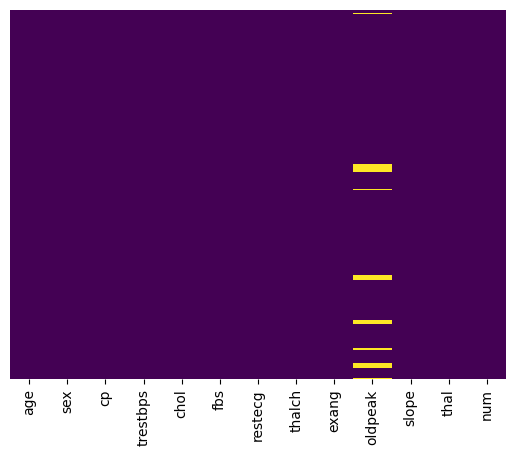

In [ ]:
sns.heatmap(Heart1.isnull(),yticklabels=False,xticklabels=True,cbar=False,cmap='viridis')


In [ ]:
Heart1['oldpeak'].fillna(Heart1['oldpeak'].mean(),inplace=True)

In [ ]:
Heart1.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
Heart1[Heart1.duplicated()].shape

(1, 13)

In [ ]:
Heart1[Heart1.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [ ]:
Heart1.drop_duplicates(inplace=True)

In [ ]:
Heart1.shape

(907, 13)

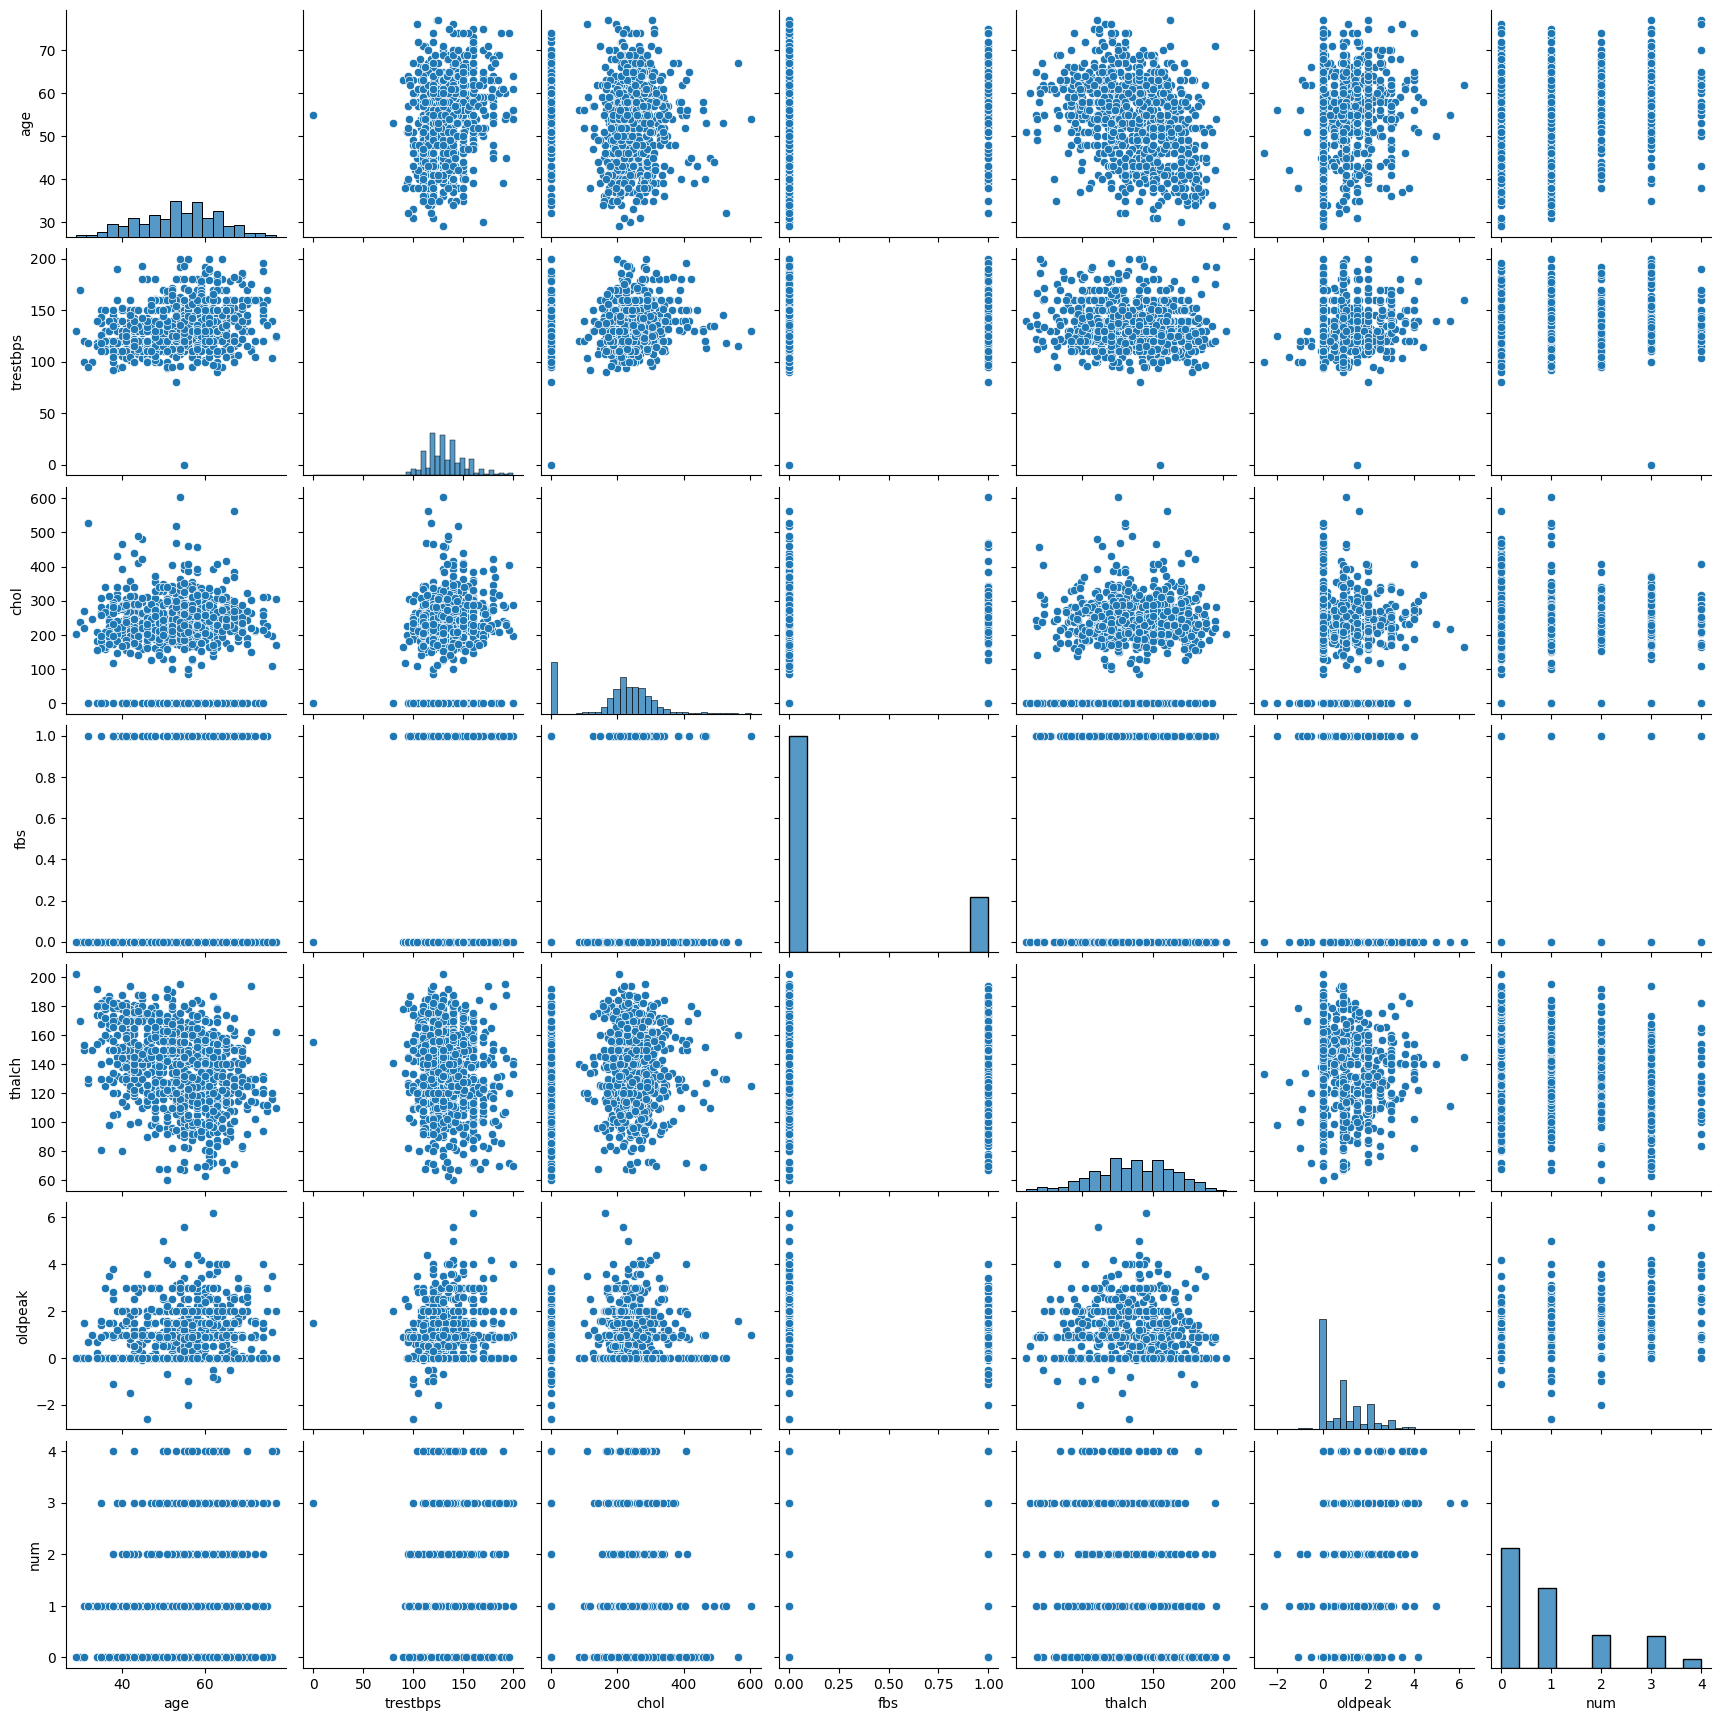

In [ ]:
import seaborn as sns
sns.pairplot(Heart1.iloc[:,:13])

In [ ]:
Heart1.drop('fbs',axis=1,inplace=True)

In [ ]:
Heart1.drop('num',axis=1,inplace=True)

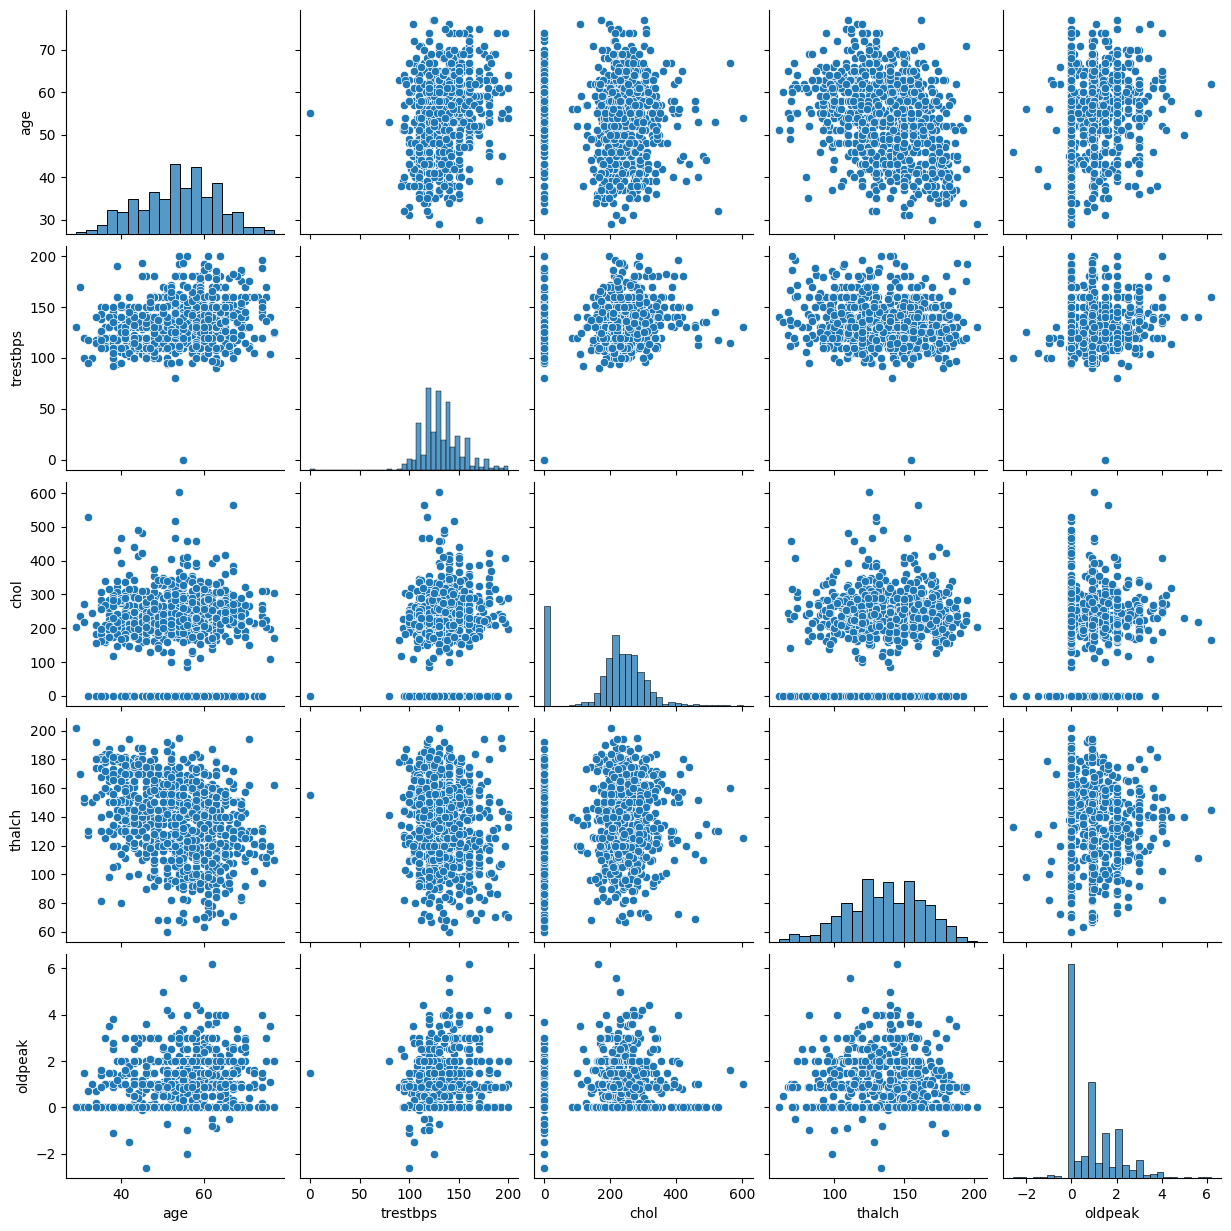

In [ ]:
sns.pairplot(Heart1.iloc[:,:13])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

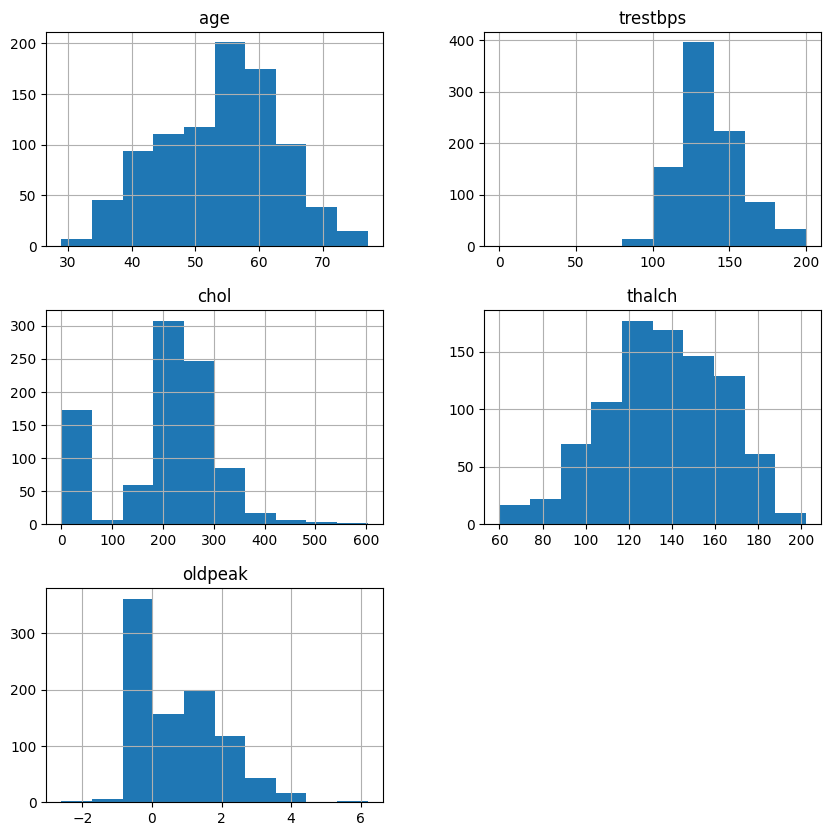

In [ ]:
Heart1.hist(figsize=(10,10))

In [ ]:
Heart1

,age,sex,cp,trestbps,chol,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,lv hypertrophy,150,False,2.300000,downsloping,fixed defect
1,41,Male,atypical angina,135,203,normal,132,False,0.000000,flat,fixed defect
2,57,Male,asymptomatic,140,192,normal,148,False,0.400000,flat,fixed defect
3,52,Male,typical angina,118,186,lv hypertrophy,190,False,0.000000,flat,fixed defect
4,57,Male,asymptomatic,110,201,normal,126,True,1.500000,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,normal,120,False,1.500000,upsloping,reversable defect
904,62,Male,asymptomatic,166,170,st-t abnormality,120,True,3.000000,flat,reversable defect
905,56,Male,non-anginal,170,0,lv hypertrophy,123,True,2.500000,downsloping,normal
906,56,Male,non-anginal,144,208,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect


In [ ]:
#complete heart dataset
label_encoder = preprocessing.LabelEncoder()
Heart['cp']= label_encoder.fit_transform(Heart['cp'])
Heart['sex']= label_encoder.fit_transform(Heart['sex'])

In [ ]:
 X = Heart[['sex','chol']]
 Y = Heart['cp']

In [ ]:
X

,sex,chol
0,1,233
1,1,203
2,1,192
3,1,186
4,1,201
...,...,...
903,1,0
904,1,170
905,1,0
906,1,208


In [ ]:
Y

,cp
0,3
1,1
2,0
3,3
4,0
5,0
6,2
7,2
8,1
9,2


In [ ]:
Heart['cp'].unique()

array([3, 1, 0, 2])

In [ ]:
Heart.cp.value_counts()

,count
cp,
0,495
2,203
1,165
3,45


In [ ]:
colnames = list(Heart.columns)
colnames

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [ ]:
# Splitting data into training and testing data set
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

**DECISION TREE MODEL**

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
best_model

DecisionTreeClassifier(max_depth=2)

In [ ]:
#Building Decision Tree Classifier using Entropy Criteria
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

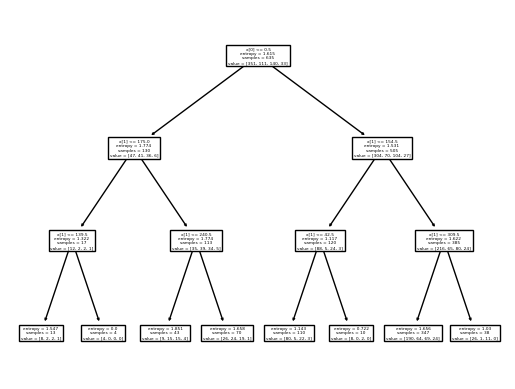

In [ ]:
#PLot the decision tree
tree.plot_tree(model);

In [ ]:
model.feature_importances_

array([0.34418107, 0.65581893])

In [ ]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

,0
chol,0.655819
sex,0.344181


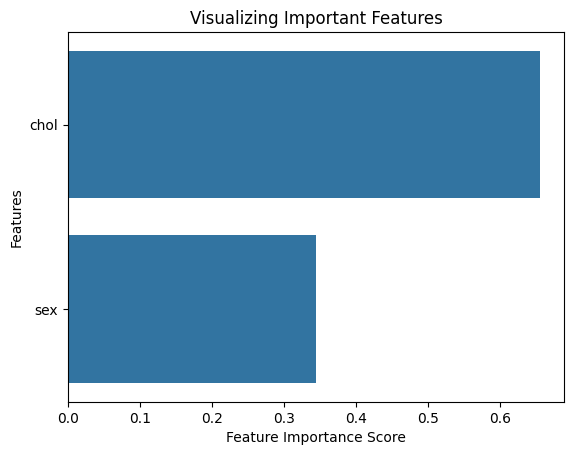

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

,count
0,244
1,29


In [ ]:
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
pd.crosstab(Y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
cp,,
0,136,8
1,44,10
2,54,9
3,10,2


In [ ]:
# Accuracy
np.mean(preds==Y_test)

0.5347985347985348

In [ ]:
# For ROC-AUC, you need probabilities for each class
# Replace 'model' with your trained model
Y_probs = model.predict_proba(X_test)

In [ ]:
# Calculate ROC-AUC for each class
for i in range(Y_probs.shape[1]):
    roc_auc = roc_auc_score(Y_test == i, Y_probs[:, i])
    print(f"ROC-AUC for class {i}: {roc_auc}")

ROC-AUC for class 0: 0.5993755383290267
ROC-AUC for class 1: 0.6262472518180281
ROC-AUC for class 2: 0.5267573696145124
ROC-AUC for class 3: 0.5798212005108557


**Questions asked**


**Q1)**Hyperparameters of decision tree models


criterion:	Measures the quality of a split. 'gini' for Gini impurity and 'entropy' for information gain. Affects how the tree decides where to split.


max_depth:	The maximum depth of the tree. Limits the number of levels in the tree, preventing overfitting if set to a reasonable value.


min_samples_split:	The minimum number of samples required to split an internal node. Helps control overfitting by preventing splits on nodes with too few samples.


min_samples_leaf:	The minimum number of samples required to be at a leaf node. Also helps control overfitting.

**Q2)**Both label encoding and one-hot encoding are used to convert categorical data into numerical format, but they differ in how they represent the categories:

Label Encoding: Assigns a unique numerical label to each category.



For example:

Color: Red, Green, Blue



Label Encoding: 0, 1, 2


One-Hot Encoding: Creates binary (0 or 1) features for each category.



For example:


Color: Red, Green, Blue



One-Hot Encoding:



Red:   1 0 0



Green: 0 1 0



Blue:  0 0 1